In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from transformers import BertTokenizer, BertModel
import torch
from transformers import DistilBertTokenizer, DistilBertModel

D:\Anaconda_Installation\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_excel("C:\\Users\\PAVAN\\Downloads\\processed_data.xlsx")

In [3]:
data.columns 

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Name', 'Role', 'Transcript',
       'Resume', 'decision', 'Reason for decision', 'Job Description',
       'Transcript_processed', 'Resume_processed', 'Job_Description_processed',
       'Transcript_sentiment', 'Resume_sentiment', 'JobDescription_sentiment',
       'Transcript_words', 'Resume_words', 'Years_Experience',
       'resume_jd_similarity', 'Transcript_jd_similarity',
       'resume_transcript_similarity', 'resume_sentence_count',
       'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length', 'resume_jd_similarity_transformers',
       'transcript_jd_similarity_transformers',
       'transcript_resume_similarity_transformers'],
      dtype='object')

In [4]:
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True) 
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description', 'Transcript_processed',
       'Resume_processed', 'Job_Description_processed', 'Transcript_sentiment',
       'Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_jd_similarity',
       'Transcript_jd_similarity', 'resume_transcript_similarity',
       'resume_sentence_count', 'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length', 'resume_jd_similarity_transformers',
       'transcript_jd_similarity_transformers',
       'transcript_resume_similarity_transformers'],
      dtype='object')

In [5]:
transcripts = data['Transcript'].tolist()
resumes = data['Resume'].tolist()
job_desc = data['Job Description'].tolist()

In [6]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased") 

In [7]:
def get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32):
    embeddings = []
    total_batches = (len(texts) + batch_size - 1) // batch_size  # Total number of batches
    print(f"Total Batches: {total_batches}")
    for i in range(total_batches):
        # Print progress\n"
        print(f"Processing batch {i + 1}/{total_batches}...")
        # Get the current batch\n",
        batch = texts[i * batch_size:(i + 1) * batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Use the [CLS] token representation for each text in the batch\n",
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy(),
        embeddings.extend(batch_embeddings)
    return embeddings

In [8]:
batch_embeddings = get_bert_embeddings_batch(transcripts, tokenizer, model, batch_size=32)

Total Batches: 93
Processing batch 1/93...
Processing batch 2/93...
Processing batch 3/93...
Processing batch 4/93...
Processing batch 5/93...
Processing batch 6/93...
Processing batch 7/93...
Processing batch 8/93...
Processing batch 9/93...
Processing batch 10/93...
Processing batch 11/93...
Processing batch 12/93...
Processing batch 13/93...
Processing batch 14/93...
Processing batch 15/93...
Processing batch 16/93...
Processing batch 17/93...
Processing batch 18/93...
Processing batch 19/93...
Processing batch 20/93...
Processing batch 21/93...
Processing batch 22/93...
Processing batch 23/93...
Processing batch 24/93...
Processing batch 25/93...
Processing batch 26/93...
Processing batch 27/93...
Processing batch 28/93...
Processing batch 29/93...
Processing batch 30/93...
Processing batch 31/93...
Processing batch 32/93...
Processing batch 33/93...
Processing batch 34/93...
Processing batch 35/93...
Processing batch 36/93...
Processing batch 37/93...
Processing batch 38/93...
Pro

In [10]:
# Flatten the nested batch_embeddings
flat_embeddings = [embedding for batch in batch_embeddings for embedding in batch]
data['bert_embeddings_trans'] = flat_embeddings

In [12]:
batch_embeddings_resume = get_bert_embeddings_batch(resumes, tokenizer, model, batch_size=32)

Total Batches: 93
Processing batch 1/93...
Processing batch 2/93...
Processing batch 3/93...
Processing batch 4/93...
Processing batch 5/93...
Processing batch 6/93...
Processing batch 7/93...
Processing batch 8/93...
Processing batch 9/93...
Processing batch 10/93...
Processing batch 11/93...
Processing batch 12/93...
Processing batch 13/93...
Processing batch 14/93...
Processing batch 15/93...
Processing batch 16/93...
Processing batch 17/93...
Processing batch 18/93...
Processing batch 19/93...
Processing batch 20/93...
Processing batch 21/93...
Processing batch 22/93...
Processing batch 23/93...
Processing batch 24/93...
Processing batch 25/93...
Processing batch 26/93...
Processing batch 27/93...
Processing batch 28/93...
Processing batch 29/93...
Processing batch 30/93...
Processing batch 31/93...
Processing batch 32/93...
Processing batch 33/93...
Processing batch 34/93...
Processing batch 35/93...
Processing batch 36/93...
Processing batch 37/93...
Processing batch 38/93...
Pro

In [13]:
flat_embeddings_res = [embedding for batch in batch_embeddings_resume for embedding in batch]
data['bert_embeddings_resume'] = flat_embeddings_res

In [16]:
batch_embeddings_job_desc = get_bert_embeddings_batch(job_desc, tokenizer, model, batch_size=32)

Total Batches: 93
Processing batch 1/93...
Processing batch 2/93...
Processing batch 3/93...
Processing batch 4/93...
Processing batch 5/93...
Processing batch 6/93...
Processing batch 7/93...
Processing batch 8/93...
Processing batch 9/93...
Processing batch 10/93...
Processing batch 11/93...
Processing batch 12/93...
Processing batch 13/93...
Processing batch 14/93...
Processing batch 15/93...
Processing batch 16/93...
Processing batch 17/93...
Processing batch 18/93...
Processing batch 19/93...
Processing batch 20/93...
Processing batch 21/93...
Processing batch 22/93...
Processing batch 23/93...
Processing batch 24/93...
Processing batch 25/93...
Processing batch 26/93...
Processing batch 27/93...
Processing batch 28/93...
Processing batch 29/93...
Processing batch 30/93...
Processing batch 31/93...
Processing batch 32/93...
Processing batch 33/93...
Processing batch 34/93...
Processing batch 35/93...
Processing batch 36/93...
Processing batch 37/93...
Processing batch 38/93...
Pro

In [17]:
flat_embeddings_jd = [embedding for batch in batch_embeddings_job_desc for embedding in batch]
data['bert_embeddings_jobDesc'] = flat_embeddings_jd

In [20]:
trans_expanded = pd.DataFrame(data['bert_embeddings_trans'].tolist(), index=data.index)
trans_expanded.columns = [f'trans_emb_{i}' for i in range(trans_expanded.shape[1])]

In [21]:
resume_expanded = pd.DataFrame(data['bert_embeddings_resume'].tolist(), index=data.index)
resume_expanded.columns = [f'resume_emb_{i}' for i in range(resume_expanded.shape[1])]

In [22]:
jd_expanded = pd.DataFrame(data['bert_embeddings_jobDesc'].tolist(), index=data.index)
jd_expanded.columns = [f'jd_emb_{i}' for i in range(jd_expanded.shape[1])]

In [23]:
df_expanded = pd.concat([data, trans_expanded, resume_expanded , jd_expanded], axis=1)

In [25]:
df_expanded = df_expanded.drop(columns=['bert_embeddings_trans', 'bert_embeddings_resume','bert_embeddings_jobDesc'])

In [26]:
df_expanded.to_excel("C:\\Users\\PAVAN\\Downloads\\bert_embeddings.xlsx")

In [27]:
## After Bert Embeddings 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [30]:
# pip install xgboost

In [32]:
label_encoder = LabelEncoder()
df_expanded['decision_encoded'] = label_encoder.fit_transform(df_expanded['decision'])
# Step 2: Split features and target
# Assuming embeddings columns are named like 'trans_emb_0', 'resume_emb_0', etc.\n",
embedding_columns = [col for col in df_expanded.columns if col.startswith('trans_emb_') or col.startswith('resume_emb_') or col.startswith('jd_emb_')]
X = df_expanded[embedding_columns]
y = df_expanded['decision_encoded']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
model = XGBClassifier(use_label_encoder=False,max_depth=5,n_estimators=200,learning_rate=0.1, eval_metric='logloss')
model.fit(X_train, y_train)

D:\Anaconda_Installation\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:16:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred = model.predict(X_test)

In [43]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8192567567567568


In [44]:
print("roc_auc:", roc_auc_score(y_test, y_pred))

roc_auc: 0.8190380990460957


## Combining derived features with the BERT embeddings

In [45]:
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason for decision', 'Job Description', 'Transcript_processed',
       'Resume_processed', 'Job_Description_processed', 'Transcript_sentiment',
       'Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_jd_similarity',
       'Transcript_jd_similarity', 'resume_transcript_similarity',
       'resume_sentence_count', 'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length', 'resume_jd_similarity_transformers',
       'transcript_jd_similarity_transformers',
       'transcript_resume_similarity_transformers', 'bert_embeddings_trans',
       'bert_embeddings_resume', 'bert_embeddings_jobDesc'],
      dtype='object')

In [47]:
df_expanded[['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience',
       'resume_sentence_count', 'resume_avg_word_length', 'skill_match_count',
       'university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length']]

,Transcript_sentiment,Resume_sentiment,JobDescription_sentiment,Transcript_words,Resume_words,Years_Experience,resume_sentence_count,resume_avg_word_length,skill_match_count,university_education_count,transcript_vocab_diversity,transcript_avg_sentence_length
0,0.270412,0.307407,0.50,348,221,14,1,7.737557,8,2,0.548851,348
1,0.296350,0.130833,0.50,387,241,11,1,7.676349,7,2,0.591731,387
2,0.173791,0.202970,0.50,282,255,14,1,7.117647,9,1,0.475177,282
3,0.198376,0.131515,0.50,402,237,7,1,7.130802,7,1,0.519900,402
4,0.324771,0.111750,0.25,306,299,0,1,7.394649,9,2,0.522876,306
...,...,...,...,...,...,...,...,...,...,...,...,...
2953,0.265649,0.107810,0.00,366,326,6,1,7.263804,4,2,0.609290,366
2954,0.223822,0.130000,0.00,437,309,0,1,7.482201,4,2,0.494279,437
2955,0.091538,0.146667,0.00,441,290,1,1,7.665517,6,2,0.428571,441
2956,0.220782,0.093155,0.00,444,373,8,1,7.624665,4,2,0.495495,444


### Calculating the similarity between transcript , resume , job description using the BERT embeddings

In [55]:
# Resume and Transcript similarity using Bert embeddings 
from sklearn.metrics.pairwise import cosine_similarity
tra_res_simi = []
for tra , res in zip(flat_embeddings , flat_embeddings_res):
    tra_res_simi.append(cosine_similarity([tra],[res])[0][0])

In [57]:
tra_jd_simi = []
for tra , jd in zip(flat_embeddings , flat_embeddings_jd):
    tra_jd_simi.append(cosine_similarity([tra],[jd])[0][0])

In [58]:
jd_res_simi = []
for jd , res in zip(flat_embeddings_jd , flat_embeddings_res):
    jd_res_simi.append(cosine_similarity([jd],[res])[0][0])

In [59]:
df_expanded['Bert_TransRes_Similarity'] = tra_res_simi
df_expanded['Bert_TransJobDesc_Similarity'] = tra_jd_simi
df_expanded['Bert_ResJobDesc_Similarity'] = jd_res_simi 

In [62]:
derived_features = df_expanded[['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity']]

In [174]:
## Merging the entire data 

In [64]:
new_data = pd.concat([X,derived_features],axis=1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
model1 = XGBClassifier(use_label_encoder=False,max_depth=5,n_estimators=200,learning_rate=0.1, eval_metric='logloss')
model1.fit(X_train, y_train)

D:\Anaconda_Installation\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred = model1.predict(X_test)

In [68]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("roc_auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.8074324324324325
roc_auc: 0.8070486091277775


In [175]:
## Creating another model using other parameters 

In [88]:
model2 = XGBClassifier(use_label_encoder=False,max_depth=10,n_estimators=500,learning_rate=0.1, eval_metric='logloss')
model2.fit(X_train, y_train)

D:\Anaconda_Installation\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:13:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred = model2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("roc_auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.8108108108108109
roc_auc: 0.8108413777346204


In [90]:
## Using Optuna for parameter Tuning 
# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

### Hyper parameter tuning in Xgboost model using Optuna 

In [82]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [91]:
def objective(trial):
    # Define the hyperparameters to tune
    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
    }

    # Create the model
    model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **param_grid)

    # Train on the training set
    model3.fit(X_train, y_train)

    # Evaluate on the validation set
    val_accuracy = model3.score(X_val, y_val)
    return val_accuracy

In [92]:
# Create a study
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=5, timeout=3600)  # 5 trials or 1 hour

# Print the best hyperparameters
print("Best Hyperparameters:", study.best_params)

[I 2025-01-20 09:15:33,196] A new study created in memory with name: no-name-0a029e1f-2692-4e55-a456-39e0b2dabbe7
D:\Anaconda_Installation\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-20 09:16:41,138] Trial 0 finished with value: 0.79957805907173 and parameters: {'max_depth': 6, 'n_estimators': 950, 'learning_rate': 0.06284871597977612, 'subsample': 0.8617020311729658, 'colsample_bytree': 0.8735892562046127, 'gamma': 9.121298316286419}. Best is trial 0 with value: 0.79957805907173.
D:\Anaconda_Installation\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_l

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 950, 'learning_rate': 0.06284871597977612, 'subsample': 0.8617020311729658, 'colsample_bytree': 0.8735892562046127, 'gamma': 9.121298316286419}


In [93]:
best_params = study.best_params
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params)
model3.fit(X_train, y_train)

# Evaluate the model
accuracy = model3.score(X_test, y_test)
y_pred = model3.predict(X_test)
print(f"Test Accuracy: {accuracy}")
print("roc_auc:", roc_auc_score(y_test, y_pred))

D:\Anaconda_Installation\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.8175675675675675
roc_auc: 0.8175123217491738


## Building Artificial Neural Network (ANN)

In [94]:
## Using the ANN for predictions 

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
model = Sequential([
    # Input layer
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalize inputs for faster convergence
    Dropout(0.1),  # Dropout to prevent overfitting

    # Hidden layers
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    # Output layer
    Dense(1, activation='sigmoid')  # For binary classification
])


In [97]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)


In [98]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,  # Increase max epochs for deeper models
    batch_size=8,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


190/190 [==============================] - 12s 20ms/step - loss: 0.5613 - accuracy: 0.7264 - val_loss: 0.6098 - val_accuracy: 0.7282
Epoch 2/50
190/190 [==============================] - 3s 15ms/step - loss: 0.4626 - accuracy: 0.7601 - val_loss: 0.3603 - val_accuracy: 0.8100
Epoch 3/50
190/190 [==============================] - 3s 14ms/step - loss: 0.4431 - accuracy: 0.7746 - val_loss: 0.3361 - val_accuracy: 0.8074
Epoch 4/50
190/190 [==============================] - 3s 15ms/step - loss: 0.4272 - accuracy: 0.7786 - val_loss: 0.4890 - val_accuracy: 0.7335
Epoch 5/50
190/190 [==============================] - 3s 14ms/step - loss: 0.4050 - accuracy: 0.7964 - val_loss: 0.7448 - val_accuracy: 0.6121
Epoch 6/50
190/190 [==============================] - 3s 14ms/step - loss: 0.4059 - accuracy: 0.8017 - val_loss: 0.3402 - val_accuracy: 0.8285
Epoch 7/50
190/190 [==============================] - 3s 15ms/step - loss: 0.3702 - accuracy: 0.8116 - val_loss: 0.6804 - val_accuracy: 0.7

In [101]:
y_test_pred_nn = model.predict(X_test)

19/19 [==============================] - 0s 6ms/step


In [103]:
y_test_pred_nn = [i[0] for i in y_test_pred_nn]

## Building Ensemble using the xgboost predictions , ANN predictions

In [107]:
y_test_pred_proba_xgb = model2.predict_proba(X_test)[:, 1]

In [109]:
test_df = pd.DataFrame()
test_df['actuals'] = y_test
test_df['xgb_pred'] = y_test_pred_proba_xgb
test_df['nn_pred'] = y_test_pred_nn

In [110]:
test_df

,actuals,xgb_pred,nn_pred
2012,0,0.000174,0.284155
1688,0,0.006083,0.981084
764,0,0.000125,0.058240
2057,0,0.000195,0.577987
2025,0,0.000148,0.351028
...,...,...,...
809,0,0.000023,0.003124
691,0,0.000016,0.003167
1188,0,0.000408,0.867861
2798,1,0.986428,0.998818


In [111]:
test_df['mean_prob'] = (test_df['xgb_pred'] + test_df['nn_pred']) / 2

In [114]:
test_df['ensemble'] = test_df['mean_prob'].round()

In [115]:
accuracy_score(test_df['ensemble'] , test_df['actuals'])

0.9408783783783784

## LSTM model  without using the derived features 

In [126]:
train_lstm = X_train.drop(columns = ['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity'])

val_lstm = X_val.drop(columns = ['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity'])

test_lstm = X_test.drop(columns = ['Transcript_sentiment','Resume_sentiment', 'JobDescription_sentiment', 'Transcript_words',
       'Resume_words', 'Years_Experience', 'resume_avg_word_length', 'skill_match_count','university_education_count', 'transcript_vocab_diversity',
       'transcript_avg_sentence_length' , 'Bert_TransRes_Similarity', 'Bert_TransJobDesc_Similarity' , 'Bert_ResJobDesc_Similarity'])

In [133]:
# Reshape the input to add a "timesteps" dimension
train_lstm_reshaped = train_lstm.values.reshape((train_lstm.shape[0], 1, train_lstm.shape[1]))
val_lstm_reshaped = val_lstm.values.reshape((val_lstm.shape[0], 1, val_lstm.shape[1]))

# Build the model
model4 = Sequential()
model4.add(LSTM(128, input_shape=(1, train_lstm.shape[1]), return_sequences=True))  # Input shape is now (1, input_size)
model4.add(LSTM(64))
model4.add(Dropout(0.3))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with reshaped data
history = model4.fit(train_lstm_reshaped, y_train, epochs=50, batch_size=32, validation_data=(val_lstm_reshaped, y_val))

Epoch 1/50
60/60 [==============================] - 16s 71ms/step - loss: 0.5217 - accuracy: 0.7289 - val_loss: 0.5909 - val_accuracy: 0.7173
Epoch 2/50
60/60 [==============================] - 1s 25ms/step - loss: 0.3986 - accuracy: 0.7844 - val_loss: 0.3327 - val_accuracy: 0.8038
Epoch 3/50
60/60 [==============================] - 1s 24ms/step - loss: 0.3087 - accuracy: 0.8113 - val_loss: 0.3279 - val_accuracy: 0.8038
Epoch 4/50
60/60 [==============================] - 2s 26ms/step - loss: 0.3105 - accuracy: 0.8203 - val_loss: 0.3402 - val_accuracy: 0.7975
Epoch 5/50
60/60 [==============================] - 2s 26ms/step - loss: 0.2871 - accuracy: 0.8288 - val_loss: 0.3074 - val_accuracy: 0.7911
Epoch 6/50
60/60 [==============================] - 2s 26ms/step - loss: 0.2705 - accuracy: 0.8388 - val_loss: 0.3334 - val_accuracy: 0.7827
Epoch 7/50
60/60 [==============================] - 1s 25ms/step - loss: 0.2729 - accuracy: 0.8245 - val_loss: 0.3059 - val_accuracy: 0.7806
Epoch 8/50
6

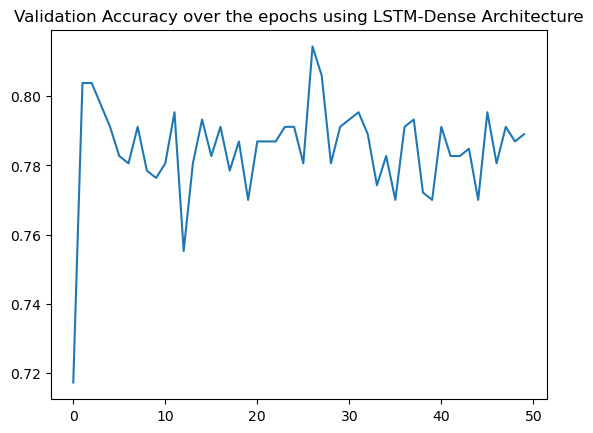

In [141]:
plt.plot(history.history['val_accuracy'])
plt.title("Validation Accuracy over the epochs using LSTM-Dense Architecture")
plt.show()

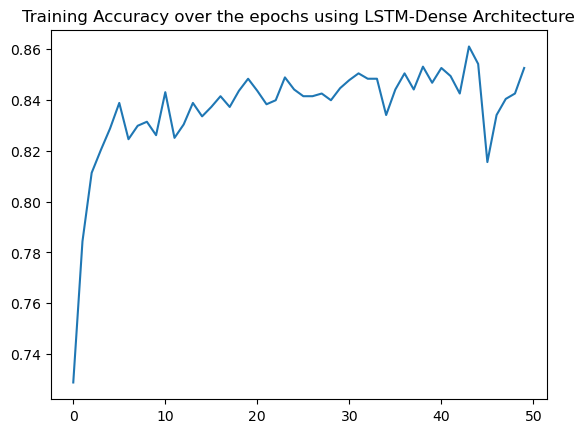

In [142]:
plt.plot(history.history['accuracy'])
plt.title("Training Accuracy over the epochs using LSTM-Dense Architecture")
plt.show()

In [143]:
## Reshaping the test data for giving to LSTM
test_lstm_reshaped = test_lstm.values.reshape((test_lstm.shape[0], 1, test_lstm.shape[1])) 

In [145]:
lstm_preds = model4.predict(test_lstm_reshaped)

19/19 [==============================] - 0s 9ms/step


In [154]:
## Ensemble for 3 models 

In [155]:
preds_df = test_df.copy()

In [159]:
preds_df.columns

Index(['actuals', 'xgb_pred', 'nn_pred', 'mean_prob', 'ensemble'], dtype='object')

In [161]:
## Creating the new frame with only xgb_preds , nn_preds , lstm_preds , actuals 
preds_df = preds_df[['actuals','xgb_pred','nn_pred']]
preds_df['lstm_pred'] = lstm_preds

In [163]:
preds_df.head()

,actuals,xgb_pred,nn_pred,lstm_pred
2012,0,0.000174,0.284155,0.000067
1688,0,0.006083,0.981084,0.500776
764,0,0.000125,0.058240,0.000015
2057,0,0.000195,0.577987,0.003137
2025,0,0.000148,0.351028,0.000969


In [164]:
## Building 2 different types of ensembles 
#       1. Maximum Voting Classifier 
#       2. Average Prediction classifier 

In [167]:
preds_df['xgb_class'] = (preds_df['xgb_pred'] > 0.5).astype(int)
preds_df['nn_class'] = (preds_df['nn_pred'] > 0.5).astype(int)
preds_df['lstm_class'] = (preds_df['lstm_pred'] > 0.5).astype(int)

In [169]:
preds_df['max_vote_class'] = preds_df[['xgb_class', 'nn_class', 'lstm_class']].mode(axis=1)[0]

In [170]:
accuracy = accuracy_score(preds_df['actuals'], preds_df['max_vote_class'])
print(f"Final Accuracy: {accuracy}")

Final Accuracy: 0.856418918918919


In [171]:
# Average voting classifier 
preds_df['mean_prob'] = (preds_df['xgb_pred'] + preds_df['nn_pred'] + preds_df['lstm_pred'])/3

In [172]:
preds_df['mean_class'] = preds_df['mean_prob'].round()

In [173]:
accuracy = accuracy_score(preds_df['actuals'], preds_df['mean_class'])
print(f"Final Accuracy: {accuracy}")

Final Accuracy: 0.9155405405405406
